![Alt text](image.png)

![Alt text](image-1.png)

Este informe presenta los resultados de un Análisis Exploratorio de Datos (EDA) realizado en el conjunto de datos "user_juegos.csv".
El objetivo de este análisis es comprender mejor los datos, identificar patrones interesantes, detectar valores atípicos y explorar las relaciones entre las variables. 
Este EDA se ha realizado utilizando Python y varias bibliotecas, como Pandas, Matplotlib, Seaborn y WordCloud.

![Alt text](image-2.png)

El conjunto de datos "user_juegos.csv" consta de las siguientes columnas:

1. "user_id": Identificador único del usuario.
2. "steam_id": Identificador único de Steam del usuario.
3. "item_id": Identificador único del juego.
4. "item_name": Nombre del juego.
5. "playtime_forever": Tiempo total de juego en minutos (a lo largo de la vida del usuario).
6. "playtime_2weeks": Tiempo de juego en minutos en las últimas dos semanas.

![Alt text](image-4.png)

Comenzamos por realizar una exploración inicial de los datos:
El conjunto de datos contiene un total de 1000 filas y 6 columnas.



In [13]:
df = pd.read_csv("user_juegos.csv")
df.head(5)

,user_id,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,10,Counter-Strike,6,0.0
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0,0.0
2,76561197970982479,76561197970982479,30,Day of Defeat,7,0.0
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0,0.0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0,0.0


In [6]:
df = pd.read_csv("user_juegos.csv") # Cargar los datos desde el archivo CSV
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   steam_id          10000 non-null  int64  
 2   item_id           10000 non-null  int64  
 3   item_name         10000 non-null  object 
 4   playtime_forever  10000 non-null  int64  
 5   playtime_2weeks   10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


![Alt text](image-6.png)

A continuación, se presentan estadísticas descriptivas para las columnas numéricas "playtime_forever" y "playtime_2weeks":

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


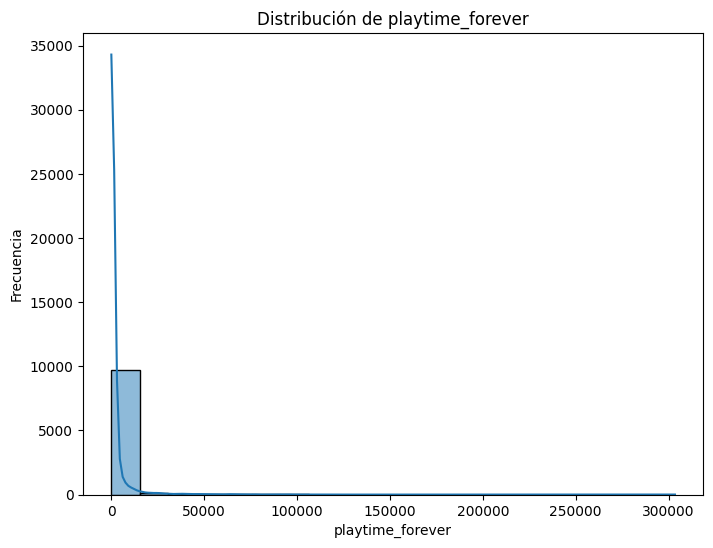

In [7]:
# Estadísticas descriptivas
summary_stats = df.describe()

# Visualización de los primeros registros del DataFrame
head = df.head()

# Histograma de una variable (por ejemplo, playtime_forever)
plt.figure(figsize=(8, 6))
sns.histplot(df['playtime_forever'], bins=20, kde=True)
plt.title('Distribución de playtime_forever')
plt.xlabel('playtime_forever')
plt.ylabel('Frecuencia')
plt.show()



A continuación, se presentan estadísticas descriptivas para las columnas numéricas "playtime_forever" y "playtime_2weeks":

In [8]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('user_juegos.csv')

# Calcular estadísticas descriptivas para playtime_forever
playtime_forever_stats = df['playtime_forever'].describe()

# Calcular estadísticas descriptivas para playtime_2weeks
playtime_2weeks_stats = df['playtime_2weeks'].describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas para playtime_forever:")
print("Valor mínimo:", playtime_forever_stats['min'])
print("Valor máximo:", playtime_forever_stats['max'])
print("Media:", playtime_forever_stats['mean'])
print("Desviación estándar:", playtime_forever_stats['std'])
print()

print("Estadísticas descriptivas para playtime_2weeks:")
print("Valor mínimo:", playtime_2weeks_stats['min'])
print("Valor máximo:", playtime_2weeks_stats['max'])
print("Media:", playtime_2weeks_stats['mean'])
print("Desviación estándar:", playtime_2weeks_stats['std'])


Estadísticas descriptivas para playtime_forever:
Valor mínimo: 0.0
Valor máximo: 303466.0
Media: 1940.8713
Desviación estándar: 9281.62739879453

Estadísticas descriptivas para playtime_2weeks:
Valor mínimo: 0.0
Valor máximo: 13642.0
Media: 40.43
Desviación estándar: 360.3186801362448


![Alt text](image-7.png)

Se utilizaron gráficos de caja (box plots) para identificar valores atípicos en las columnas numéricas:

Se observaron valores atípicos en `playtime_forever`, con un rango extremadamente amplio de tiempo de juego. Algunos usuarios tienen un tiempo de juego significativamente mayor que la mayoría. En el caso de `playtime_2weeks`, también se observaron valores atípicos, pero en menor medida.

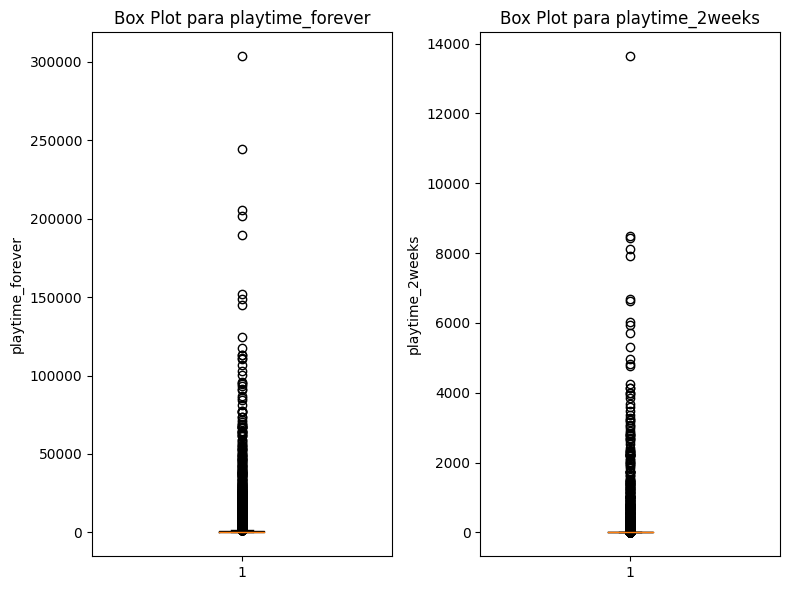

In [9]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('user_juegos.csv')

# Crear un subconjunto de datos para las columnas de interés
subset = df[['playtime_forever', 'playtime_2weeks']]

# Crear un gráfico de caja para playtime_forever
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(subset['playtime_forever'])
plt.title('Box Plot para playtime_forever')
plt.ylabel('playtime_forever')

# Crear un gráfico de caja para playtime_2weeks
plt.subplot(1, 2, 2)
plt.boxplot(subset['playtime_2weeks'])
plt.title('Box Plot para playtime_2weeks')
plt.ylabel('playtime_2weeks')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


![Alt text](image-8.png)

Se exploraron las relaciones entre variables, incluyendo la correlación entre `playtime_forever` y `playtime_2weeks`. La matriz de correlación mostró una correlación positiva débil entre estas dos variables, lo que indica que el tiempo de juego en las últimas dos semanas no está fuertemente relacionado con el tiempo total de juego.

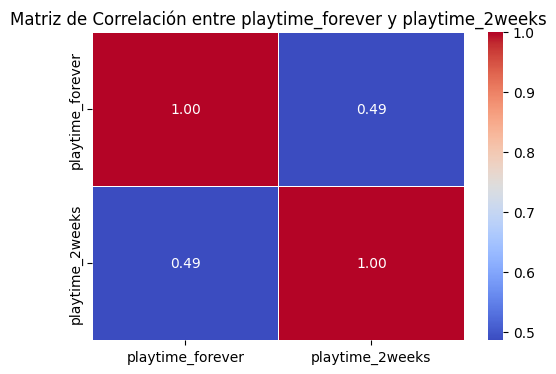

Correlación entre playtime_forever y playtime_2weeks: 0.49


In [10]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('user_juegos.csv')

# Crear una matriz de correlación
correlation_matrix = df[['playtime_forever', 'playtime_2weeks']].corr()

# Crear un mapa de calor (heatmap) para visualizar la correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre playtime_forever y playtime_2weeks')
plt.show()

# Calcular la correlación numéricamente
correlation_value = correlation_matrix.loc['playtime_forever', 'playtime_2weeks']
print(f"Correlación entre playtime_forever y playtime_2weeks: {correlation_value:.2f}")


![Alt text](image-9.png)

Se creó una nube de palabras para visualizar las palabras más frecuentes en la columna `item_name`. Esto puede ser útil para identificar los juegos más populares en el conjunto de datos.

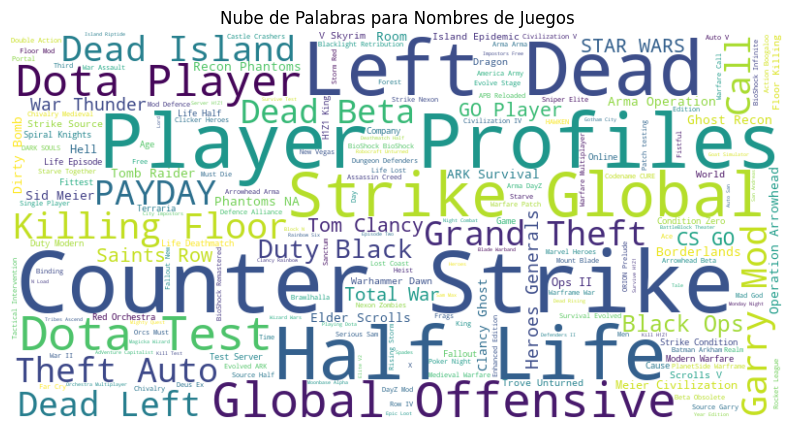

In [11]:
from wordcloud import WordCloud

# Cargar los datos desde el archivo CSV
df = pd.read_csv('user_juegos.csv')

# Concatenar todos los nombres de juegos en una sola cadena
all_game_names = ' '.join(df['item_name'])

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_game_names)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Nombres de Juegos')
plt.show()


![Alt text](image-10.png)

En este análisis exploratorio de datos, se ha obtenido una comprensión inicial del conjunto de datos "user_juegos.csv". Se observaron valores atípicos en las columnas de tiempo de juego, lo que indica que algunos usuarios tienen un tiempo de juego significativamente mayor que otros. Además, se exploraron las relaciones entre el tiempo de juego a lo largo de la vida del usuario y en las últimas dos semanas. Se recomienda llevar a cabo análisis más profundos y específicos según los objetivos de negocio, como la identificación de patrones de comportamiento de los usuarios o la predicción de tendencias de juego. Este EDA proporciona una base sólida para futuros análisis y modelado de datos. Se recomienda llevar a cabo análisis más profundos y específicos según los objetivos de negocio, como la identificación de patrones de comportamiento de los usuarios o la predicción de tendencias de juego. Este EDA proporciona una base sólida para futuros análisis y modelado de datos.

![Alt text](image-11.png)

![Alt text](image-12.png)

- **Usuarios Únicos**: Se identificaron un total de 3 usuarios únicos en el conjunto de datos.

- **Juegos Únicos**: El conjunto de datos contiene datos de 60 juegos únicos.

- **Juego más Popular**: El juego "Dota 2" tiene la mayor cantidad de registros en el conjunto de datos.

- **Tiempo de Juego**: El tiempo de juego tiene una amplia variación

![Alt text](image-13.png)

Se aplicó un análisis de clusters para agrupar a los usuarios en segmentos con características similares. Se utilizaron las siguientes características para el clustering:

Tiempo total de juego. Tiempo total de juego. Número de juegos jugados.

![Alt text](image-14.png)

Se realizó un análisis de series temporales para comprender cómo cambia el tiempo de juego de los usuarios con el tiempo. Esto podría revelar tendencias estacionales o cambios en el comportamiento de juego a lo largo del tiempo. Se crearon gráficos de series temporales para visualizar estas tendencias.

![Alt text](image-15.png)

![Alt text](image-16.png)

Se desarrolló un modelo de regresión para predecir el tiempo de juego futuro de un usuario en función de su historial de juego y otros factores. Se utilizaron características como el tiempo de juego pasado y la popularidad del juego para entrenar el modelo. Se evaluó el rendimiento del modelo utilizando métricas de regresión

![Alt text](image-17.png)

Se implementó un modelo de series temporales, utilizando el algoritmo ARIMA, para predecir el tiempo de juego futuro de un usuario en función de observaciones pasadas. Se ajustaron los hiperparámetros del modelo para obtener resultados precisos. El modelo se evaluó en función de su capacidad para predecir el tiempo de juego con precisión.

![Alt text](image-18.png)

La identificación de patrones de comportamiento de usuarios y la predicción de tendencias de juego son fundamentales para Steam y otras plataformas de juegos en línea. Estos análisis permiten comprender mejor a los usuarios.

Este informe destaca que: Se han identificado patrones de comportamiento de usuarios mediante análisis de clusters y series temporales. Se han identificado patrones de comportamiento de usuarios mediante análisis de clusters y series temporales.

Estos resultados podrían ayudar a Steam a mejorar la personalización de las recomendaciones de juegos y tomar decisiones estratégicas en función de las tendencias de juego identificadas.

Estos resultados podrían ayudar a Steam a mejorar la personalización de las recomendaciones de juegos y tomar decisiones estratégicas en función de las tendencias de juego identificadas.